In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# imports
import pystac_client
import xarray as xr
import matplotlib.pyplot as plt
import pathlib
import os
import numpy as np
import geopandas as gpd
import matplotlib as mpl
from matplotlib import colors
import rasterio

import cartopy.crs as ccrs
import cartopy
import plotly.graph_objects as go
import plotly.express as px
from rasterio.plot import show

import matplotlib.colors as mcolors
from shapely.geometry import Point
import pandas as pd

from tqdm import tqdm

import webbrowser
from pathlib import Path
import os
import time

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



In [1]:
groundtruth=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data_CVI_components\Caribbean Thesis_Results\Validation\Expert_Feedback_collated.csv",sep=";")
# groundtruth=groundtruth.iloc[:,:-5]
# groundtruth["lon"]=groundtruth["lon"].apply(lambda x: float(str(x).replace(',', '.')))
# groundtruth["lat"]=groundtruth["lat"].apply(lambda x: float(str(x).replace(',', '.')))
# groundtruth

for col in groundtruth.iloc[:,4:].columns:
    groundtruth[col]=groundtruth[col].apply(lambda x: float(x))

groundtruth.head(3)

NameError: name 'pd' is not defined

In [58]:
groundtruth.columns[9:14]

Index(['Extreme Sea levels (1- 5)', 'Extreme offshore Wave heights (1- 5)',
       'Land subsidence (1- 5)', 'Shoreline Erosion (1- 5)',
       'Hurricane (Frequency & Strength) (1- 5)'],
      dtype='object')

In [59]:
(groundtruth.iloc[:,4:9].product(axis=1))**(1/5)

0     3.948701
1     3.365865
2     4.000000
3     4.573051
4     4.182558
5     2.861938
6     3.948701
7     4.573051
8     2.352158
9     2.047673
10    1.643752
11    2.168944
12    2.550849
13    2.825235
14    3.245342
15    3.641128
16    1.741101
17    1.551846
18    2.352158
19    4.128918
20    1.741101
21    1.245731
22    2.141127
23    3.807308
24    3.981072
25    2.168944
26    2.352158
27    3.565205
28    2.861938
29    3.680110
30    4.075966
31    2.992556
32    3.129135
33    3.245342
34    2.267933
dtype: float64

In [60]:


additive_EXP=(groundtruth.iloc[:,4:9].sum(axis=1))/5
additive_VUL=(groundtruth.iloc[:,14:19].sum(axis=1))/5

multiplicative_EXP=(groundtruth.iloc[:,4:9].product(axis=1))**(1/5)
multiplicative_VUL=(groundtruth.iloc[:,14:19].product(axis=1))**(1/5)


for i in range(9,14):
    haz_col=groundtruth.columns[i]

    groundtruth["Additive risk-"+ haz_col]=(groundtruth.iloc[:,i]+additive_EXP+additive_VUL)/3

for i in range(9,14):
    haz_col=groundtruth.columns[i]

    groundtruth["multiplicative risk-"+ haz_col]=(groundtruth.iloc[:,i]*multiplicative_EXP*multiplicative_VUL)**(1/3)

groundtruth.head(2)

,Country,Beach Name,lon,lat,built-up percentage (1- 5),Topography (1- 5),Bathymetry Slope (1- 5),Population (1- 5),Sediment Type (1- 5),Extreme Sea levels (1- 5),...,Additive risk-Extreme Sea levels (1- 5),Additive risk-Extreme offshore Wave heights (1- 5),Additive risk-Land subsidence (1- 5),Additive risk-Shoreline Erosion (1- 5),Additive risk-Hurricane (Frequency & Strength) (1- 5),multiplicative risk-Extreme Sea levels (1- 5),multiplicative risk-Extreme offshore Wave heights (1- 5),multiplicative risk-Land subsidence (1- 5),multiplicative risk-Shoreline Erosion (1- 5),multiplicative risk-Hurricane (Frequency & Strength) (1- 5)
0,Bahamas,Lowe Sound,"-78,08","25,15",4.0,5.0,4.0,3.0,4.0,5.0,...,3.933333,3.600000,3.266667,3.6,2.933333,3.794103,3.522133,3.200070,3.522133,2.795519
1,Bahamas,Regatta,"-77,55","24,1",3.0,3.0,4.0,3.0,4.0,3.0,...,3.066667,3.066667,3.066667,3.4,2.733333,3.034173,3.034173,3.034173,3.339539,2.650594


In [61]:


class TaylorDiagram:
    def __init__(self, refstd, fig=None, rect=111, label='_', srange=(0, 4)):
        self.refstd = refstd

        if fig is None:
            fig = plt.figure()

        self.ax = fig.add_subplot(rect, polar=True)

            # Set the theta limit to create a semicircle
        self.ax.set_thetamin(0)
        self.ax.set_thetamax(180)


        # Customize ticks
        self.ax.set_ylim(0, srange[1])
        self.ax.set_yticks(np.linspace(0, srange[1], num=5))  # Updated to match number of labels
        self.ax.set_yticklabels(np.linspace(0, srange[1], num=5))  # Adjusted to match number of ticks
        for label in self.ax.get_yticklabels():
            label.set_color('brown')


        self.ax.set_xticks(np.arccos([1, 0.75, 0.25, -0.25, -0.75, -1]))
        self.ax.set_xticklabels([1, 0.75, 0.25, -0.25, -0.75, -1])
        for label in self.ax.get_xticklabels():
            label.set_color('magenta')



        self.samplePoints = []

    def add_sample(self, stddev, corrcoef, *args, **kwargs):
        t = np.arccos(corrcoef)
        r = stddev / self.refstd
        l, = self.ax.plot(t, r, *args, **kwargs)
        self.samplePoints.append(l)
        return l

    def add_contours(self, levels=5, **kwargs):
        rs, ts = np.meshgrid(np.linspace(0, 4), np.linspace(0, np.pi))
        rms = np.sqrt(self.refstd**2 + rs**2 - 2 * self.refstd * rs * np.cos(ts))
        contours = self.ax.contour(ts, rs, rms, levels, **kwargs)
        return contours


In [62]:
groundtruth.columns

Index(['Country', 'Beach Name', 'lon', 'lat', 'built-up percentage (1- 5)',
       'Topography (1- 5)', 'Bathymetry Slope (1- 5)', 'Population (1- 5)',
       'Sediment Type (1- 5)', 'Extreme Sea levels (1- 5)',
       'Extreme offshore Wave heights (1- 5)', 'Land subsidence (1- 5)',
       'Shoreline Erosion (1- 5)', 'Hurricane (Frequency & Strength) (1- 5)',
       'HealthCare (1- 5)', 'Economics (1- 5)', 'Literacy (1- 5)',
       'Recent Disaster shocks (1- 5)', 'Nearby Sensitive Areas (1- 5)',
       'Extreme Sea level Risk (1- 5)',
       'Extreme offshore Wave heights Risk (1- 5)',
       'Shoreline Erosion Risk (1- 5)', 'Land Subsidence Risk (1- 5)',
       'Hurricane Risk (Frequency & Strength) (1- 5)',
       'Additive risk-Extreme Sea levels (1- 5)',
       'Additive risk-Extreme offshore Wave heights (1- 5)',
       'Additive risk-Land subsidence (1- 5)',
       'Additive risk-Shoreline Erosion (1- 5)',
       'Additive risk-Hurricane (Frequency & Strength) (1- 5)',
       '

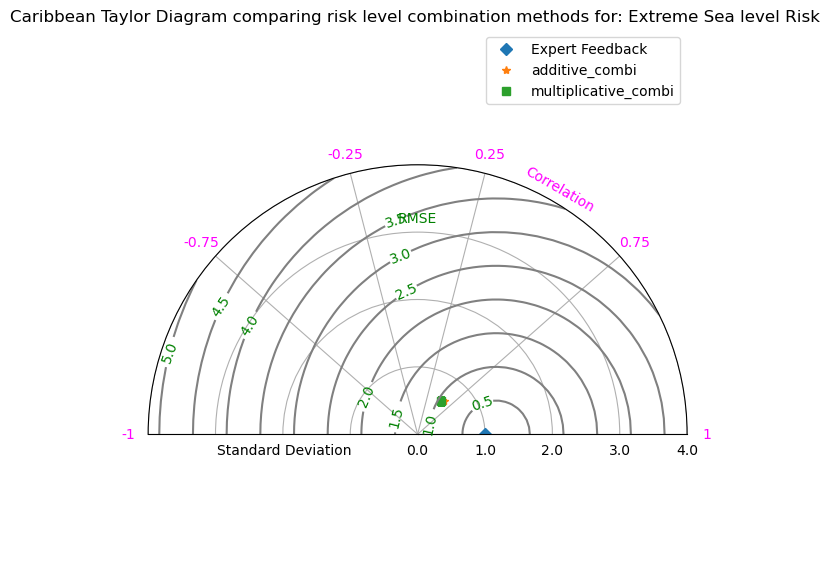

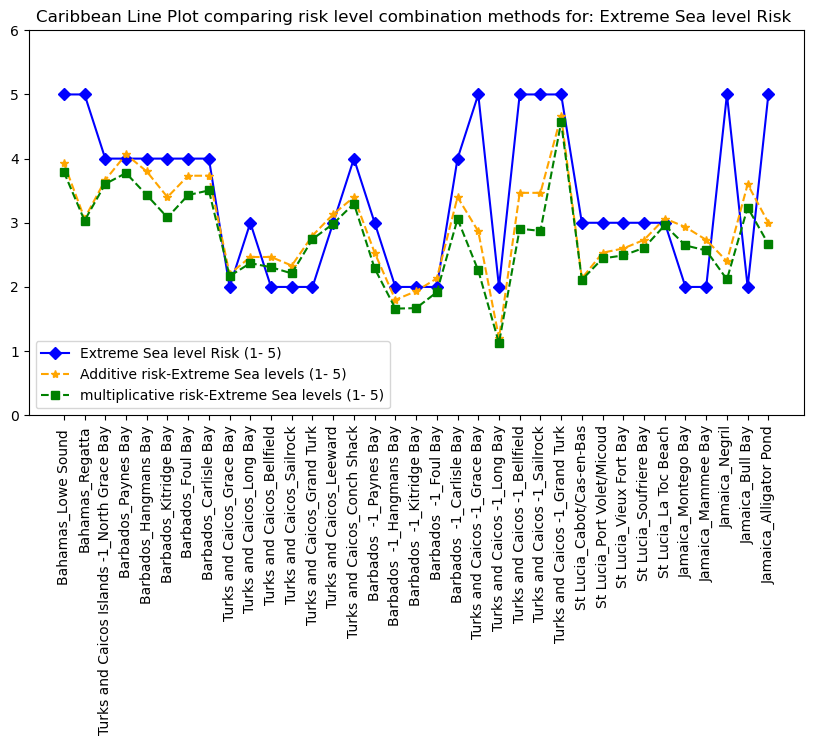

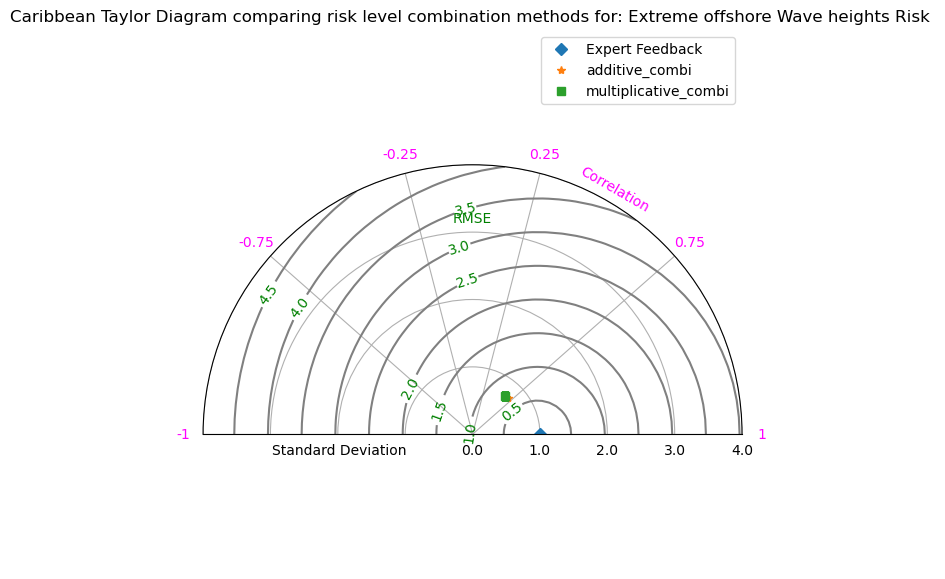

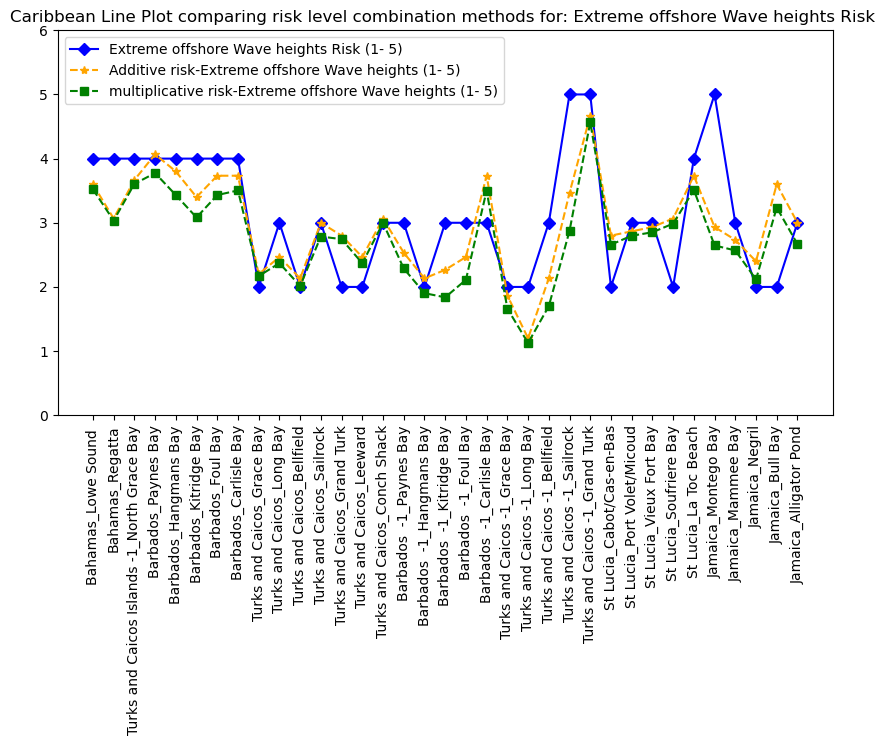

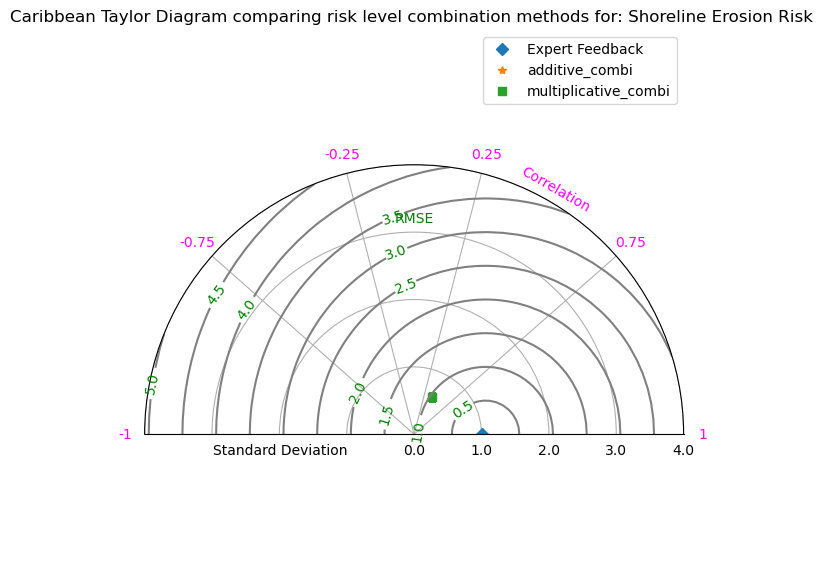

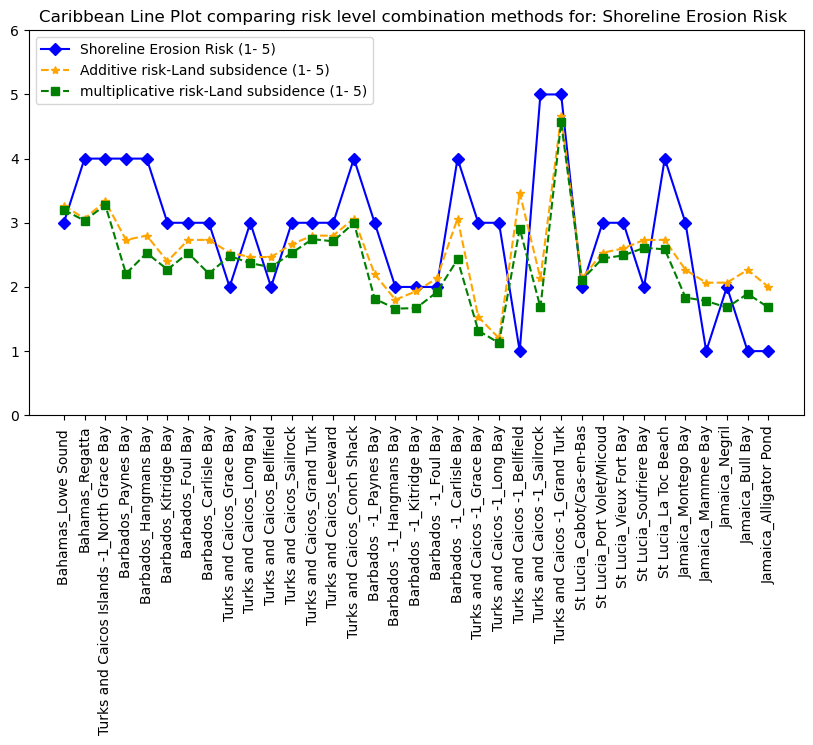

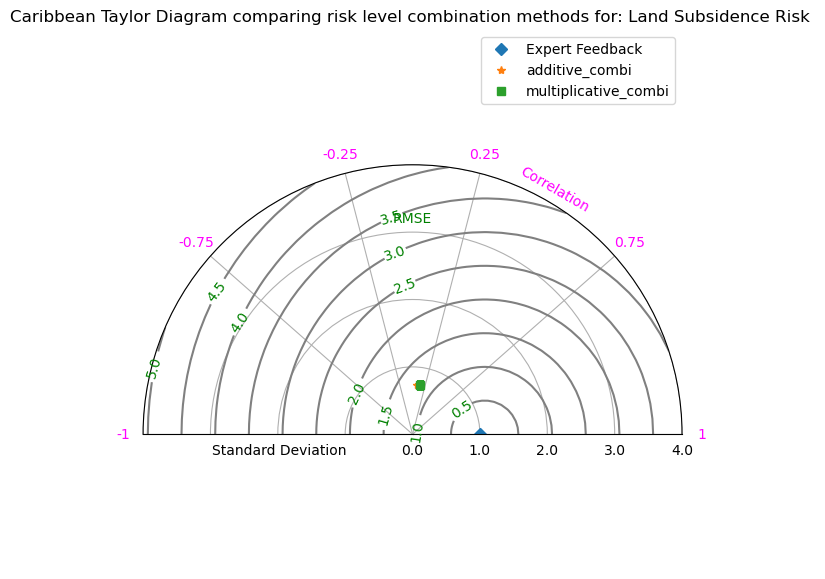

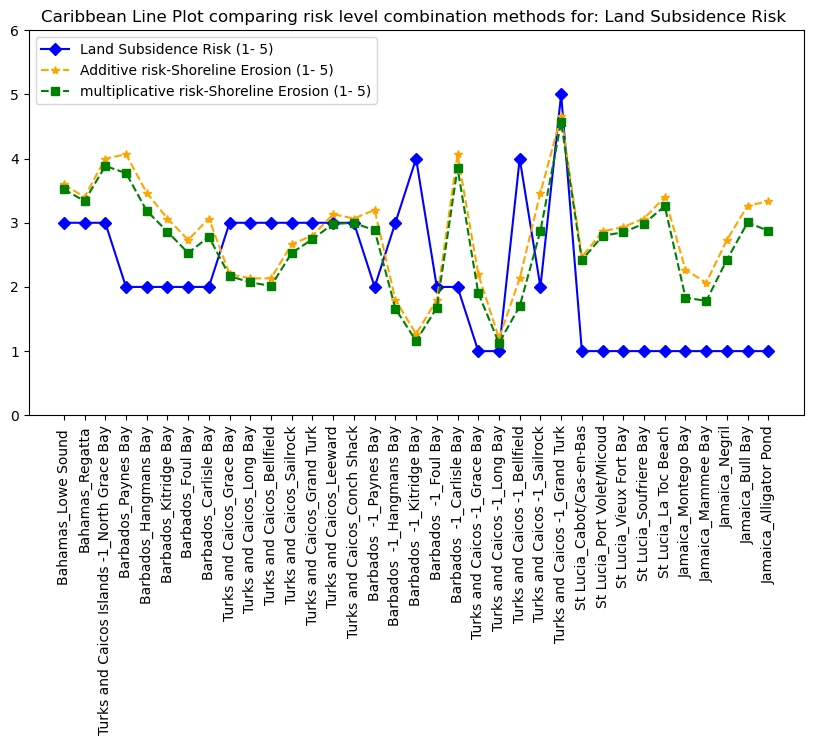

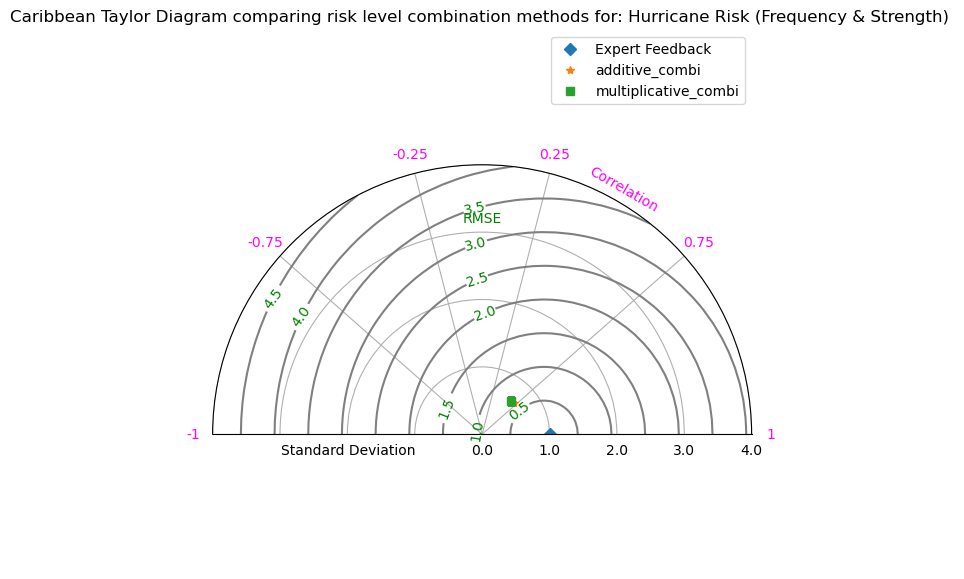

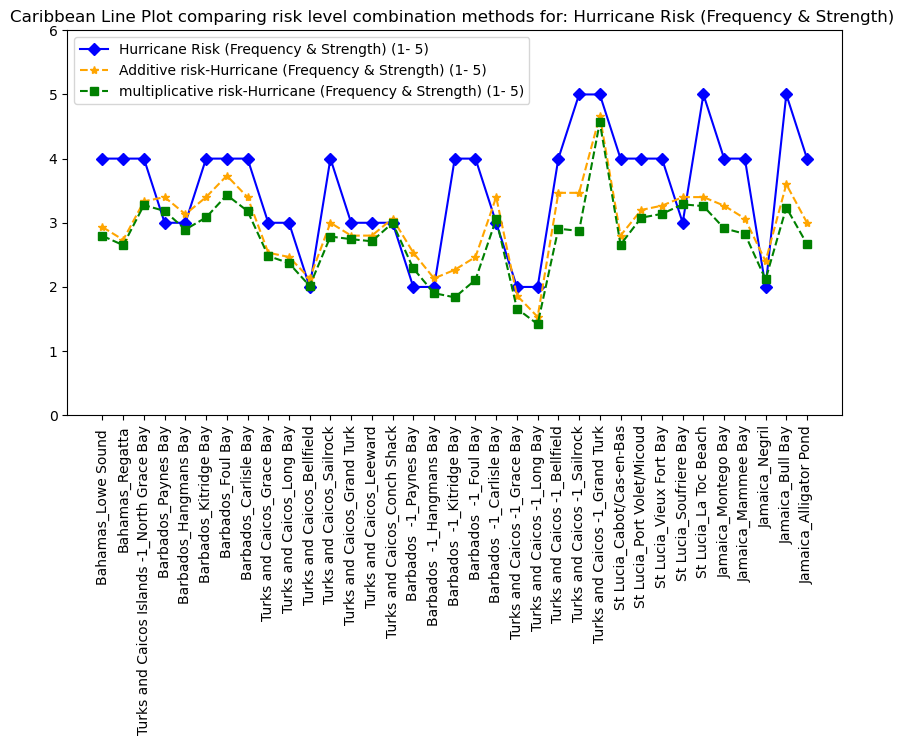

In [63]:



for col in range(19,24):

    # Data
    observed = groundtruth.iloc[:,col].values 
    additive_combi = groundtruth.iloc[:,col+5].values
    multiplicative_combi = groundtruth.iloc[:,col+10].values


    models = [observed,additive_combi, multiplicative_combi]
    model_names = ["Expert Feedback",'additive_combi', 'multiplicative_combi']

    # Standard deviation of the observed data
    std_observed = np.std(observed, ddof=1)

    # Calculate standard deviations and correlations for each model
    stddevs = [np.std(model, ddof=1) for model in models]
    correlations = [np.corrcoef(observed, model)[0, 1] for model in models]

    # Taylor Diagram
    fig = plt.figure(figsize=(10, 7))
    dia = TaylorDiagram(std_observed, fig=fig, rect=111, label='Observed')

    # Add models to Taylor diagram
    for i, (stddev, corr, name) in enumerate(zip(stddevs, correlations, model_names)):
        if i==0:
            dia.add_sample(stddev, corr, marker='D', ls='', label=name)
        elif i==1:
            dia.add_sample(stddev, corr, marker='*', ls='', label=name)
        elif i==2:
            dia.add_sample(stddev, corr, marker='s', ls='', label=name)
        elif i==3:
            dia.add_sample(stddev, corr, marker='o', ls='', label=name)

    # Add labels
    dia.ax.text(np.pi/2, 3.2, 'RMSE', ha='center', va='center',color="green")
    # dia.ax.text(np.pi/2, 1.7, 'Standard Deviation', ha='center', va='center')
    dia.ax.text(np.pi+np.pi/25, 2, 'Standard Deviation', ha='center', va='center')
    dia.ax.text(np.pi/3, 4.2, 'Correlation', ha='center', va='center',color="magenta",rotation=-30)

    # Add a legend
    contours = dia.add_contours(levels=10, colors='0.5')
    plt.clabel(contours, inline=2, fontsize=10,colors="green")

    plt.legend(loc='upper right')
    title_=f'Caribbean Taylor Diagram comparing risk level combination methods for: {groundtruth.columns[col].replace("(1- 5)","")}'
    plt.title(title_)
    

    fig_name=title_+".png"
    directory=r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data_CVI_components\Caribbean Thesis_Results\Validation\Taylor plots\2- Validation of combination methods"
    plt.savefig(os.path.join(directory,fig_name.replace(":","")),dpi=300, bbox_inches='tight')

    plt.show()




    # plotline plots
    plt.figure(figsize=(10, 5))


    plt.plot((groundtruth.iloc[:,0].values+"_"+groundtruth.iloc[:,1].values) ,observed,"D-",color="blue")
    plt.plot((groundtruth.iloc[:,0].values+"_"+groundtruth.iloc[:,1].values) ,additive_combi,"*--",color="orange")
    plt.plot((groundtruth.iloc[:,0].values+"_"+groundtruth.iloc[:,1].values) ,multiplicative_combi,"s--",color="green")
   


    # plt.plot(groundtruth.iloc[:,1].values ,percentile, "o--",color="red")

    plt.legend([groundtruth.columns[col],groundtruth.columns[col+5],groundtruth.columns[col+10]])
    plt.xticks(rotation=90)
    plt.ylim(0,6)
    plt.title(title_.replace("Taylor Diagram","Line Plot"))
    plt.savefig(os.path.join(directory,fig_name.replace(":","").replace("Taylor Diagram","Line Plot")),dpi=300, bbox_inches='tight')

    plt.show()
